In [252]:
import ira
%alphalab dark

import qlearn as q
from alpha.utils.tick_loaders import load_data, ls_data

import seaborn as sns
from sklearn.base import TransformerMixin, BaseEstimator

# Testing basics

<hr/>

QLearn gives possibility to backtest any type of signals even some manual cases. For example we could test manual portfolio trades

In [318]:
ls_data('BINANCEF')

[BINANCEF]
	m1:	BTCUSDT,ETHUSDT,SOLUSDT


In [254]:
# fromat: 'EXCHANGE:SYMBOL'

data = load_data(
    'NYSED:XOM', 'NYSED:BAC', 'NYSED:CL', 'NYSED:TGT', 'NYSED:RL', 'NASDAQD:MSFT'
) 

In [255]:
data

XOM (2005-01-03 00:00:00 / 2020-08-17 00:00:00 [4076] records)
BAC (2005-01-03 00:00:00 / 2020-08-17 00:00:00 [4076] records)
CL (2005-01-03 00:00:00 / 2020-08-17 00:00:00 [4076] records)
TGT (2005-01-03 00:00:00 / 2020-08-17 00:00:00 [4076] records)
RL (2005-01-03 00:00:00 / 2020-08-17 00:00:00 [4076] records)
MSFT (2005-01-03 00:00:00 / 2020-08-17 00:00:00 [4076] records)

In [ ]:
data.ohlc('1w')

In [262]:
# data.ticks('XOM','BAC','CL', 'TGT', 'RL', 'MSFT')
retain_columns_and_join(
    data.ticks('XOM','BAC','CL', 'TGT', 'RL', 'MSFT'), 
    'close'
)

,XOM,BAC,CL,TGT,RL,MSFT
date,,,,,,
2005-01-03,50.09,46.46,25.010,51.80,41.80,26.74
2005-01-04,49.75,45.82,24.835,51.24,41.34,26.84
2005-01-05,49.49,45.29,24.275,51.28,40.89,26.78
2005-01-06,50.12,45.22,24.865,48.50,41.03,26.75
2005-01-07,49.79,44.73,25.040,49.02,41.07,26.67
...,...,...,...,...,...,...
2020-08-11,44.97,26.92,75.960,131.72,70.21,203.38
2020-08-12,44.09,26.73,77.240,134.60,69.81,209.19
2020-08-13,43.01,26.35,76.980,134.81,70.13,208.70


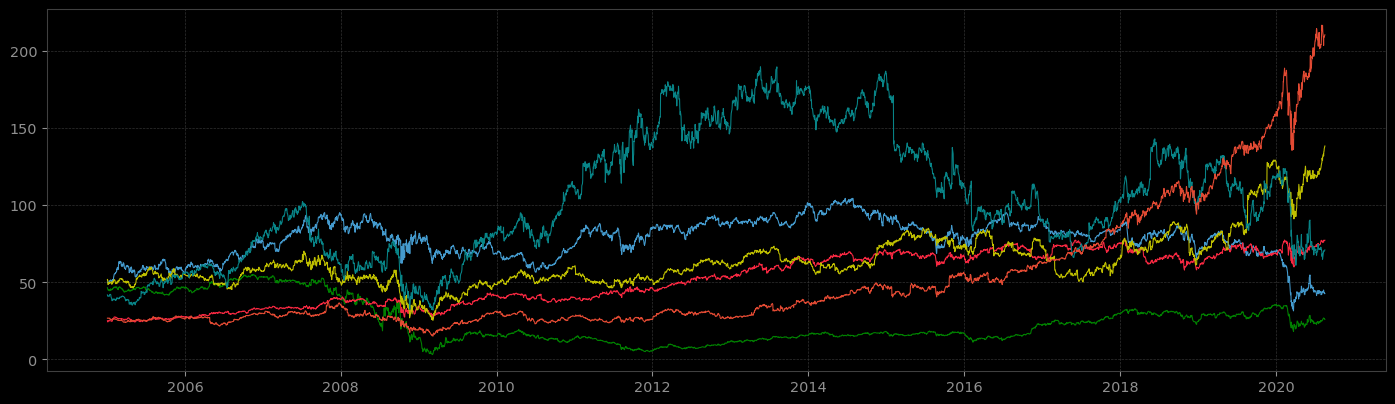

In [263]:
fig(18, 5)
plt.plot(retain_columns_and_join(data.ticks('XOM','BAC','CL', 'TGT', 'RL', 'MSFT'), 'close'));


<hr/>
Make manual entries

In [264]:
manual_signals = pd.DataFrame.from_dict({
    '2015-01-02':  [+100, +100, +100, +100, +100, +100],
    '2020-01-01':  [   0,    0,    0,    0,    0,    0],
}, orient='index', columns=['XOM', 'BAC', 'CL', 'TGT', 'RL', 'MSFT'])
manual_signals.index = pd.DatetimeIndex(manual_signals.index)

manual_signals

,XOM,BAC,CL,TGT,RL,MSFT
2015-01-02,100,100,100,100,100,100
2020-01-01,0,0,0,0,0,0


In [265]:
manual_signals_2 = pd.DataFrame.from_dict({
    '2015-01-02':  [-100, -100, +100, +100, -100, +100],
    '2018-01-01':  [-200, -200, +200, +200, -200, +200],
    '2020-01-01':  [   0,    0,    0,    0,    0,    0],
}, orient='index', columns=['XOM', 'BAC', 'CL', 'TGT', 'RL', 'MSFT'])
manual_signals_2.index = pd.DatetimeIndex(manual_signals_2.index)

manual_signals_2

,XOM,BAC,CL,TGT,RL,MSFT
2015-01-02,-100,-100,100,100,-100,100
2018-01-01,-200,-200,200,200,-200,200
2020-01-01,0,0,0,0,0,0



<hr/>
Run portfolio backtest

In [266]:
r = q.simulation(
    {
        # - 'test id' : signals
        'Manual portfolio 1': manual_signals,
        'Manual oprtfolio 2': manual_signals_2,
    }, 
    
    data.ticks(), 
    
    'stock' 
)

Fast reports viewing

 0: /Manual portfolio 1  : Sharpe: -inf | Sortino: -4.92 | CAGR: -100.00 | DD: $3737.35 (74.75%) | Gain: $8938.80 | Execs: 12 | Comm: 24.35[inc][OK]
 1: /Manual oprtfolio 2  : Sharpe: 0.98 | Sortino: 1.71 | CAGR: 33.61 | DD: $7780.00 (39.94%) | Gain: $35857.80 | Execs: 18 | Comm: 104.20[inc][OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,/Manual portfolio 1,-inf,-4.916765,-99.999582,3737.3525,74.747050,8938.799,12,24.3525
1,/Manual oprtfolio 2,0.979286,1.707771,33.608831,7780.0000,39.935338,35857.796,18,104.2040


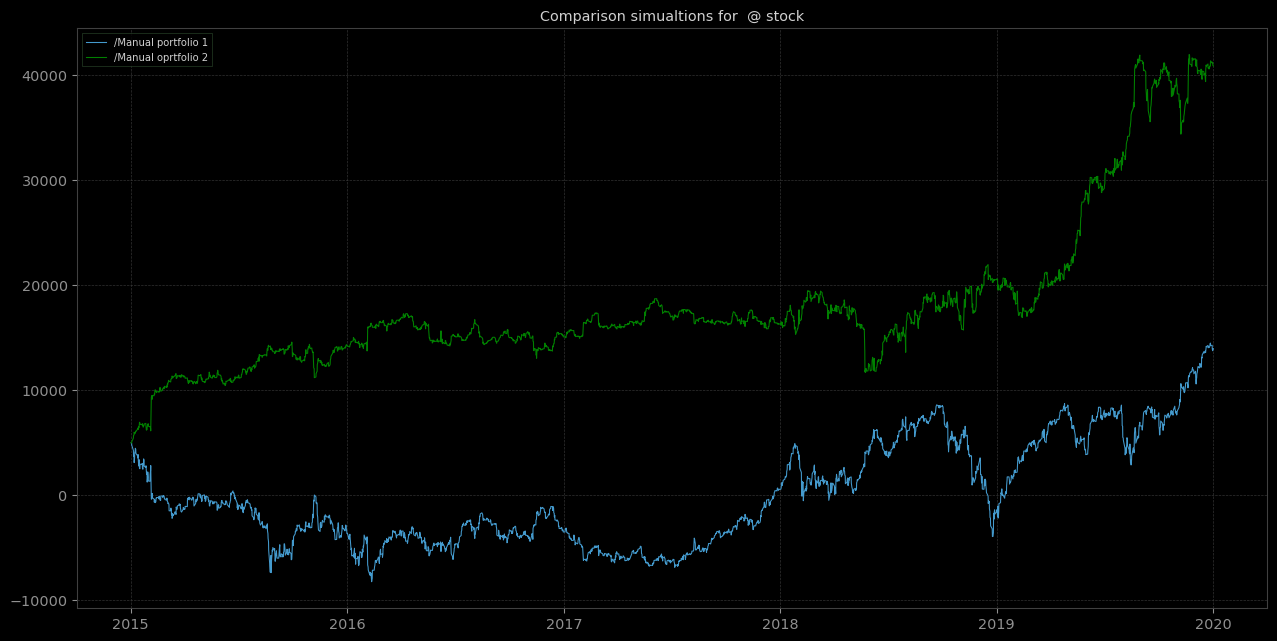

In [267]:
fig(16, 8)
r.report(5000)

In [271]:
r.results[1]

 Simulation /Manual oprtfolio 2.D9D2202081440 
	Interval: 2015-01-02 00:00:00 ~ 2020-01-01 00:00:00
	Time: 0 days 00:00:00.301992
	Signals: 3
	Execs: 18
	Symbols: XOM,BAC,CL,TGT,RL,MSFT

More detailed reports statistics

/usr/local/envs/ira_p36/lib/python3.6/site-packages/ira/analysis/portfolio.py:313: RuntimeWarning:

invalid value encountered in log1p




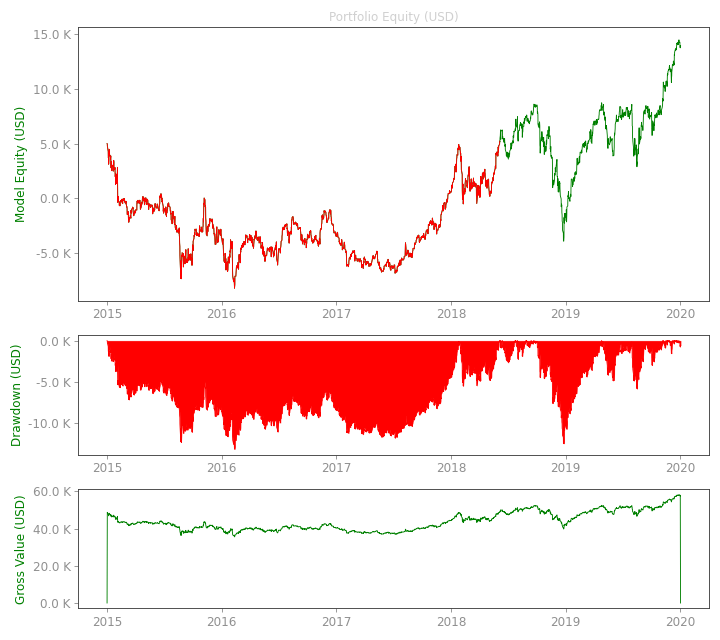

<Figure size 720x640 with 0 Axes>

In [268]:
tearsheet(r.results[0], 5000)


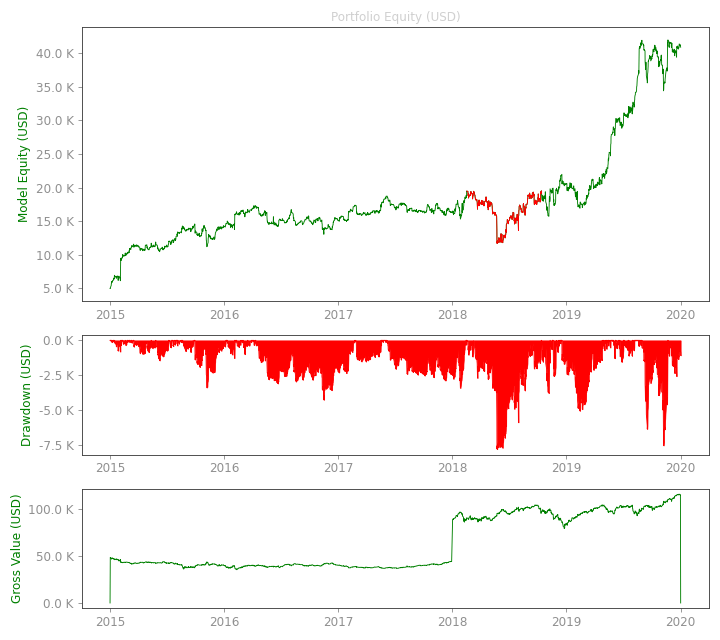

<Figure size 720x640 with 0 Axes>

In [272]:
tearsheet(r.results[1], 5000)

In [273]:
r.results[1].portfolio

,XOM_Pos,XOM_PnL,XOM_Price,XOM_Value,XOM_Commissions,BAC_Pos,BAC_PnL,BAC_Price,BAC_Value,BAC_Commissions,...,RL_Pos,RL_PnL,RL_Price,RL_Value,RL_Commissions,MSFT_Pos,MSFT_PnL,MSFT_Price,MSFT_Value,MSFT_Commissions
2015-01-01 15:55:00,0.0,0.0,92.45,0.0,0.0000,0.0,0.0,17.89,0.0,0.0000,...,0.0,0.000000e+00,185.16,0.0,0.000,0.0,0.0,46.45,0.0,0.0000
2015-01-02 09:25:00,-100.0,0.0,92.45,-9245.0,4.6225,-100.0,0.0,17.89,-1789.0,0.8945,...,-100.0,0.000000e+00,185.16,-18516.0,9.258,100.0,0.0,46.45,4645.0,2.3225
2015-01-02 15:55:00,-100.0,-38.0,92.83,-9283.0,0.0000,-100.0,-1.0,17.90,-1790.0,0.0000,...,-100.0,2.060000e+02,183.10,-18310.0,0.000,100.0,31.0,46.76,4676.0,0.0000
2015-01-05 09:25:00,-100.0,73.0,92.10,-9210.0,0.0000,-100.0,11.0,17.79,-1779.0,0.0000,...,-100.0,3.320000e+02,179.78,-17978.0,0.000,100.0,-39.0,46.37,4637.0,0.0000
2015-01-05 15:55:00,-100.0,181.0,90.29,-9029.0,0.0000,-100.0,41.0,17.38,-1738.0,0.0000,...,-100.0,1.900000e+02,177.88,-17788.0,0.000,100.0,-4.0,46.33,4633.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 15:55:00,-200.0,122.0,69.48,-13896.0,0.0000,-200.0,84.0,35.15,-7030.0,0.0000,...,-200.0,1.960000e+02,116.58,-23316.0,0.000,200.0,-280.0,157.59,31518.0,0.0000
2019-12-31 09:25:00,-200.0,92.0,69.02,-13804.0,0.0000,-200.0,24.0,35.03,-7006.0,0.0000,...,-200.0,0.000000e+00,116.58,-23316.0,0.000,200.0,-164.0,156.77,31354.0,0.0000
2019-12-31 15:55:00,-200.0,-152.0,69.78,-13956.0,0.0000,-200.0,-38.0,35.22,-7044.0,0.0000,...,-200.0,-1.280000e+02,117.22,-23444.0,0.000,200.0,186.0,157.70,31540.0,0.0000
2020-01-01 09:25:00,0.0,0.0,69.78,0.0,6.9780,0.0,0.0,35.22,0.0,3.5220,...,0.0,2.728484e-12,117.22,0.0,11.722,0.0,0.0,157.70,0.0,15.7700


In [274]:
r.results[1].executions

,instrument,quantity,exec_price,commissions,comment
2015-01-02,XOM,-100,92.45,4.6225,
2015-01-02,BAC,-100,17.89,0.8945,
2015-01-02,CL,100,69.19,3.4595,
2015-01-02,TGT,100,75.91,3.7955,
2015-01-02,RL,-100,185.16,9.2580,
2015-01-02,MSFT,100,46.45,2.3225,
2018-01-01,XOM,-100,83.64,4.1820,
2018-01-01,BAC,-100,29.52,1.4760,
2018-01-01,CL,100,75.45,3.7725,
2018-01-01,TGT,100,65.25,3.2625,


# Automatic signals generation  

<hr/>

In [276]:
btc = load_data('BINANCEF:BTCUSDT')

In [277]:
btc

BTCUSDT (2019-09-08 17:57:00 / 2022-02-07 14:03:00 [1271286] records)

In [279]:
ohlc1H = btc.ohlc('1H')

btc1H = ohlc5M['BTCUSDT']

In [280]:
btc1H

,open,high,low,close,volume
time,,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,0.002
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,0.000
2019-09-08 19:00:00,10000.00,10357.53,10000.00,10340.12,471.659
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,583.271
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,689.759
...,...,...,...,...,...
2022-02-07 10:00:00,42401.31,42619.00,42330.00,42534.00,9351.225
2022-02-07 11:00:00,42534.01,42724.96,42534.00,42692.25,8726.526
2022-02-07 12:00:00,42692.25,42780.00,42450.64,42610.62,10765.074


In [281]:
ma = smooth(btc1H.close, 'kama', 250)

In [282]:
g = LookingGlass([
    btc1H, 
    ma
])

In [283]:
g.look('2021-12-01', '2022-02-10')

FigureWidget({
    'data': [{'close': array([57607.12, 57035.13, 57313.6 , ..., 42610.62, 42775.74, 42834.48])…

In [284]:
delta = btc1H.close - ma

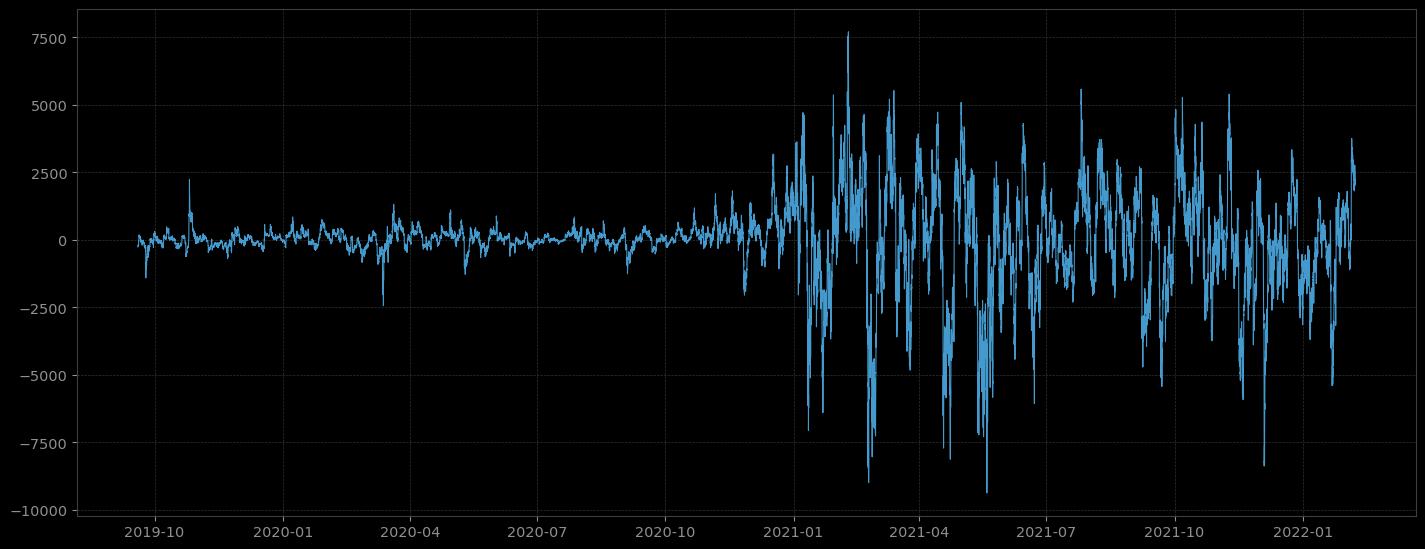

In [285]:
fig(18, 7)
plt.plot(delta)

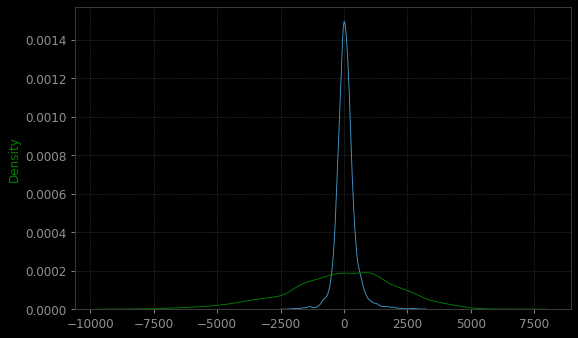

In [286]:
sns.kdeplot(delta[:'2021-01-01'], cut=1)
sns.kdeplot(delta['2021-01-01':], cut=1)

In [287]:
from ira.analysis.timeseries import series_halflife

print(series_halflife(delta[:'2021-01-01':].dropna()))
print(series_halflife(delta['2021-01-01':].dropna()))

(-15000.0, 15000.0)

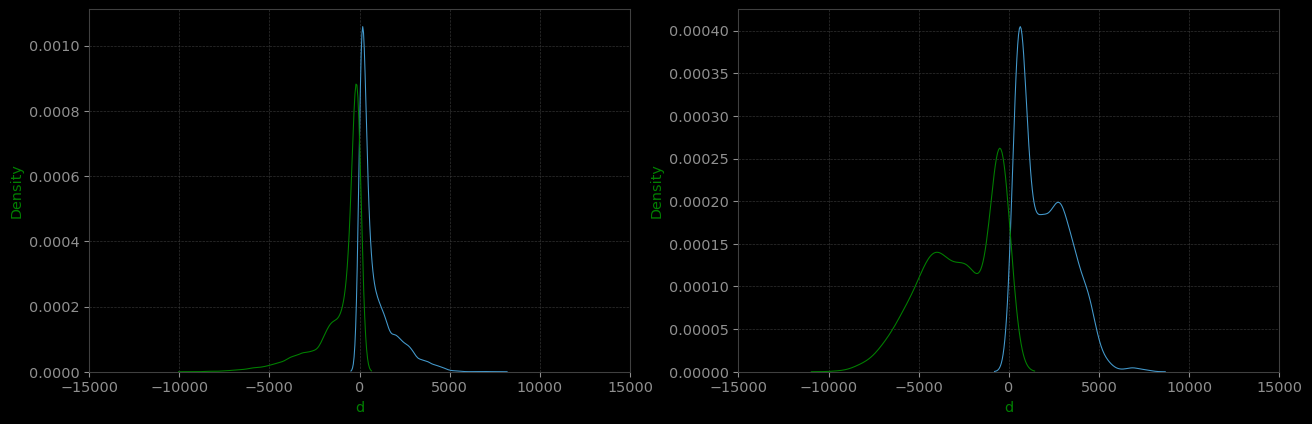

In [289]:
xd = scols(ma, delta, names=['K', 'd'])
fig(16,5)
sbp(12,1)
sns.kdeplot(xd[xd.K > xd.K.shift(1)].d)
sns.kdeplot(xd[xd.K < xd.K.shift(1)].d)
plt.xlim(-15000, +15000)

sbp(12,2)
sns.kdeplot(xd[xd.K > 1.001*xd.K.shift(1)].d)
sns.kdeplot(xd[xd.K < 0.999*xd.K.shift(1)].d)
plt.xlim(-15000, +15000)

(-15000.0, 15000.0)

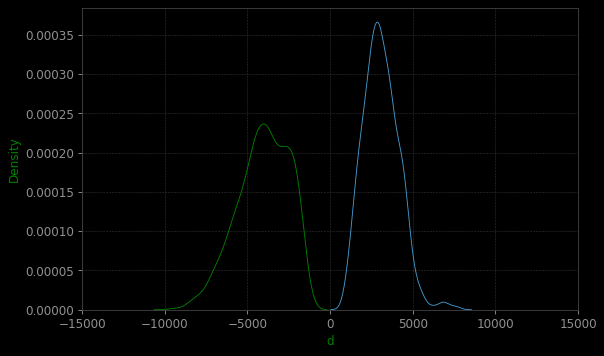

In [290]:
xd = scols(ma, delta, names=['K', 'd'])['2021-01-01':]

sns.kdeplot(xd[xd.K > 1.001*xd.K.shift(1)].d)
sns.kdeplot(xd[xd.K < 0.999*xd.K.shift(1)].d)
plt.xlim(-15000, +15000)

<hr/>

Now let's try to generate signals based on following logic:
1. Buy when close price crosses MA up and `MA[t] > (1 + f) * MA[t-1]`
2. Sell when close price crosses MA down and `MA[t] < (1 - f) * MA[t-1]`

<hr/>

In [293]:
F = 0.01
PERIOD = 250

ma = smooth(btc1H.close, 'kama', PERIOD)

delta = btc5M.close - ma

xd = scols(ma,  delta,  btc1H.close,  names=['K', 'd', 'close'])

longs = pd.Series(
    +1, index=xd[(xd.K > (1 + F/100)*xd.K.shift(1)) & (xd.close > xd.K) & (xd.close.shift(1) < xd.K.shift(1))].index
)

shorts = pd.Series(
    -1, index=xd[(xd.K < (1 - F/100)*xd.K.shift(1)) & (xd.close < xd.K) & (xd.close.shift(1) > xd.K.shift(1))].index
)

# we shift signals to end's of bar
signals = shift_signals(
    srows(longs, shorts).rename('BTCUSDT'), '59Min59S'
)

In [ ]:
btc1H

In [297]:
signals

time
2019-09-27 21:59:59    1
2019-09-28 07:59:59    1
2019-09-28 11:59:59   -1
2019-09-28 23:59:59    1
2019-09-30 12:59:59   -1
                      ..
2022-01-27 17:59:59   -1
2022-01-28 13:59:59    1
2022-01-31 00:59:59   -1
2022-02-02 21:59:59   -1
2022-02-04 14:59:59    1
Name: BTCUSDT, Length: 126, dtype: int64

In [ ]:
signals

Benchmark: buy and hold strategy

In [298]:
buy_and_hold = pd.Series([+1, 0], index=[pd.Timestamp('2021-01-01'), btc1H.index[-1]], name='BTCUSDT')
buy_and_hold

2021-01-01 00:00:00    1
2022-02-07 14:00:00    0
Name: BTCUSDT, dtype: int64

Simulations

In [306]:
r_ma = q.simulation({
    
    # Buy and hold benchmark
    'Buy&Hold': 1000 * buy_and_hold,
    
    # Simple reverse systems
    'MA trader': 1000 * signals['2021':],
    
    # Fixed risk managenement: take if price and 1.5% lose
    'MA trader fixed RM': [signals['2021':], q.FixedTrader(1000, 3000, 6000) ], 
    
    # Fixed risk managenement: 3% take and 1.5% lose
    'MA trader RM': [signals['2021':], q.FixedPctTrader(1000, 3/100, 1.5/100) ], 
    
    # Fixed risk managenement + close positions by time (after 3 Hours)
    'MA trader RM + time stop': [signals['2021':], q.PipelineTracker(
        q.FixedPctTrader(1000, 3/100, 1.5/100), 
        q.TimeExpirationTracker('3h')
    )
    ]
    
    },
    
    btc.ohlc('15Min'),  # data for testing (we use 15Min frame)
    
    'binance_um_vip0', # broker - it allows to calculate commissions etc
)

 0: /Buy&Hold                  : Sharpe: 0.70 | Sortino: 1.04 | CAGR: 27.53 | DD: $1234.01 (51.93%) | Gain: $476.69 | Execs: 2 | Comm: 0.80[inc][OK]
 1: /MA trader                 : Sharpe: 0.25 | Sortino: 0.38 | CAGR: -2.52 | DD: $1272.40 (68.17%) | Gain: $-39.41 | Execs: 38 | Comm: 30.00[inc][OK]
 2: /MA trader fixed RM        : Sharpe: 0.78 | Sortino: 1.13 | CAGR: 21.93 | DD: $448.63 (31.76%) | Gain: $366.72 | Execs: 80 | Comm: 35.80[inc][OK]
 3: /MA trader RM              : Sharpe: 0.79 | Sortino: 1.27 | CAGR: 9.14 | DD: $138.07 (11.79%) | Gain: $147.65 | Execs: 116 | Comm: 41.60[inc][OK]
 4: /MA trader RM + time stop  : Sharpe: 1.30 | Sortino: 2.40 | CAGR: 11.79 | DD: $81.88 (7.88%) | Gain: $192.00 | Execs: 118 | Comm: 45.00[inc][OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,/Buy&Hold,0.696768,1.039939,27.525145,1234.008527,51.931971,476.687317,2,0.8
1,/MA trader,0.251661,0.377444,-2.519643,1272.404039,68.169971,-39.405595,38,30.0
2,/MA trader fixed RM,0.783032,1.127990,21.933568,448.632563,31.762840,366.716212,80,35.8
3,/MA trader RM,0.785913,1.269406,9.135015,138.073432,11.790815,147.647573,116,41.6
4,/MA trader RM + time stop,1.303154,2.395025,11.793598,81.876398,7.876621,191.998989,118,45.0


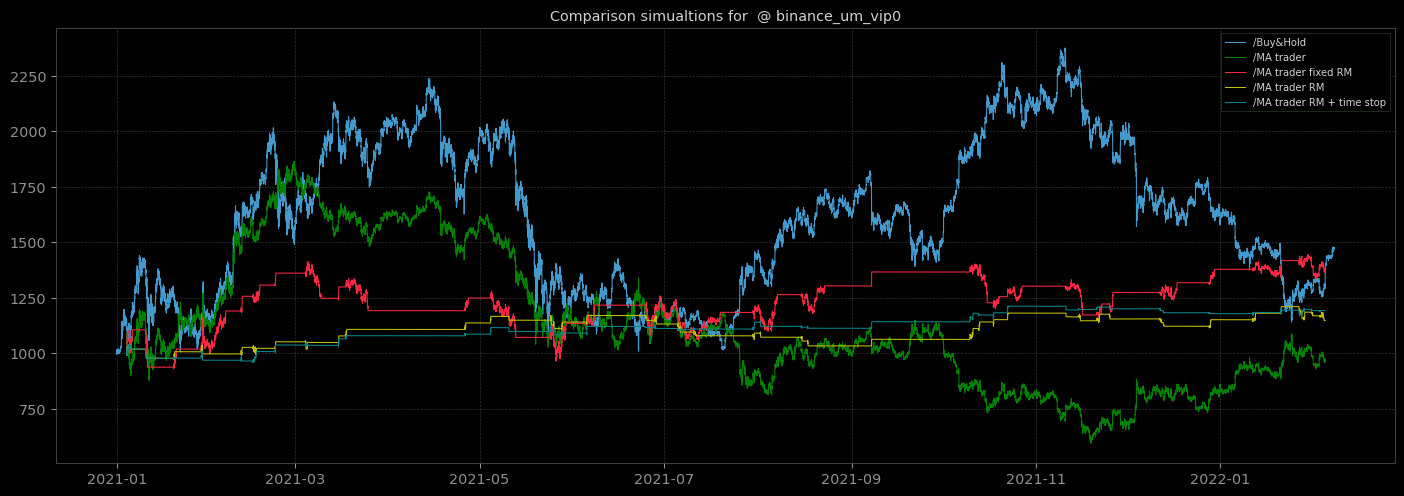

In [307]:
fig(18, 6)
r_ma.report(1000)

In [305]:
r_ma.results[3].trackers_stat

{'BTCUSDT': {'takes': 26,
  'stops': 31,
  'average_time_to_take': Timedelta('0 days 06:14:12.538461538'),
  'average_time_to_stop': Timedelta('0 days 06:24:35.838709677')}}

In [ ]:
tearsheet(r_ma.results[0], 1000)

## Make generator

<hr class='l2'/>

Now we put all code we wrote above into signal generator.

In [126]:
@q.signal_generator                     # - 1: class must be decorated as signal_generator
class CrossMovingEntry(BaseEstimator):  # - 2: class extends BaseEstimator
    
    def __init__(self, timeframe, period, step):
        self.timeframe = timeframe
        self.period = period
        self.step = step

    def fit(self, X, y, **fit_params):   # - 3: class override fit method (for ML applications)
        return self

    def predict(self, x):                # - 4: class override predict method (contains signal generation logic)
        # get price
        # self.market_info_.column - contains applicated price column (close by default)
        applied_column = self.market_info_.column
        
        price = ohlc_resample(x, self.timeframe)[applied_column]
        
        # price moving average
        ma = smooth(price, 'kama', self.period)
       
        # delta
        delta = price - ma

        # combined frame
        xd = scols(ma, delta, price, names=['K', 'd', 'price'])
        
        # longs signals 
        longs = pd.Series(
            +1, index=xd[(xd.K > (1 + self.step/100)*xd.K.shift(1)) & (xd.price > xd.K) & (xd.price.shift(1) < xd.K.shift(1))].index
        )

        # shorts signals 
        shorts = pd.Series(
            -1, index=xd[(xd.K < (1 - self.step/100)*xd.K.shift(1)) & (xd.price < xd.K) & (xd.price.shift(1) > xd.K.shift(1))].index
        )

        # collect signals into single series
        signals = srows(longs, shorts)
        
        # adjust to bar's end for 'close' case
        if applied_column == 'close':
            signals = q.shift_for_timeframe(signals, x, self.timeframe)
        
        return signals

Make generator: here we use single instrument selector (each instrument in data would be processed one by one)

In [308]:
gen = q.SingleInstrumentComposer( 
    CrossMovingEntry('1H', 250, 0.01) 
).fit(btc.ticks())

In [309]:
r_ma_gen = q.simulation({
    
    'MA trader': [gen, q.FixedTrader(1000, 0, 0)],
    
    'MA trader RM': [gen, q.FixedPctTrader(1000, 3/100, 1.5/100) ], 
    
    'MA trader RM + time stop': [gen, q.PipelineTracker(
        q.FixedPctTrader(1000, 3/100, 1.5/100), q.TimeExpirationTracker('3h'))
    ]
    
    },
    btc.ohlc('5Min'), 'binance_um_vip0',
    start='2021-01-01'
)

In [ ]:
r_ma_gen.report(1000)

In [311]:
signals

time
2019-09-27 21:59:59    1
2019-09-28 07:59:59    1
2019-09-28 11:59:59   -1
2019-09-28 23:59:59    1
2019-09-30 12:59:59   -1
                      ..
2022-01-27 17:59:59   -1
2022-01-28 13:59:59    1
2022-01-31 00:59:59   -1
2022-02-02 21:59:59   -1
2022-02-04 14:59:59    1
Name: BTCUSDT, Length: 126, dtype: int64

# Custom tracker

<hr/>

In [310]:
from ira.simulator.SignalTester import Tracker 

In [65]:
class SimpleFixedRiskManagementTracker(Tracker):
    
    def __init__(self, trading_size, risk_change_step):
        self.trading_size = trading_size
        self.risk_change_step = risk_change_step
        self.prev_pl = 0
        
        # just a statistics
        self.pos_increased = 0
        self.pos_decreased = 0
        
    def initialize(self):
        """
        Init method is called on tracker start
        """
        self.pos_increased = 0
        self.pos_decreased = 0
        # self.ohlc = self.get_ohlc_series(self.timeframe)

    def on_signal(self, signal_time, signal_qty, quote_time, bid, ask, bid_size, ask_size):
        """
        This method is called on new signal from signal's generator
    
        We can adjust position size and if signal is processed or cancelled
        """
        current_pnl = self._position.pnl - self.prev_pl
        
        n_x_factor = abs(current_pnl) // self.risk_change_step + 1
        position_size = self.trading_size
        
        if current_pnl < 0:
            position_size = position_size / n_x_factor
            self.pos_decreased += 1
            
        elif current_pnl > 0:
            position_size = position_size * n_x_factor
            self.pos_increased += 1
            
        # previous PnL
        self.prev_pl = self._position.pnl
        
        return np.sign(signal_qty) * position_size

    def update_market_data(self, instrument: str, quote_time, bid, ask, bid_size, ask_size, is_service_quote, **kwargs):
        # New market data update
        super().update_market_data(instrument, quote_time, bid, ask, bid_size, ask_size, is_service_quote, **kwargs)

    def statistics(self) -> Dict:
        return {
            'positions_incr': self.pos_increased,
            'positions_decr': self.pos_decreased,
        }

We can run this on multiple instruments (for example BTCUSDT and ETHUSDT):  

In [319]:
btc = load_data('BINANCEF:BTCUSDT', 'BINANCEF:ETHUSDT')

In [320]:
gen = q.SingleInstrumentComposer(CrossMovingEntry('1H', 250, 0.01)).fit(btc.ticks())

r_ma_gen_track = q.simulation({
    
    'Raw signals': [gen, q.FixedTrader(1000, 0, 0)],
    
    'My Tracker':  [gen, SimpleFixedRiskManagementTracker(1000, 50)],
    
    },
    btc.ohlc('15Min'), 'binance_um_vip0',
    start='2021-01-01'
)

 0: /Raw signals  : Sharpe: 0.78 | Sortino: 1.33 | CAGR: 28.72 | DD: $732.80 (27.92%) | Gain: $953.07 | Execs: 78 | Comm: 61.60[inc][OK]
 1: /My Tracker   : Sharpe: 0.84 | Sortino: 1.66 | CAGR: 46.15 | DD: $1953.62 (39.50%) | Gain: $1592.53 | Execs: 110 | Comm: 137.47[inc][OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,/Raw signals,0.784290,1.333326,28.717894,732.796270,27.918734,953.073194,78,61.600000
1,/My Tracker,0.839912,1.658436,46.145419,1953.622437,39.495931,1592.533366,110,137.466667


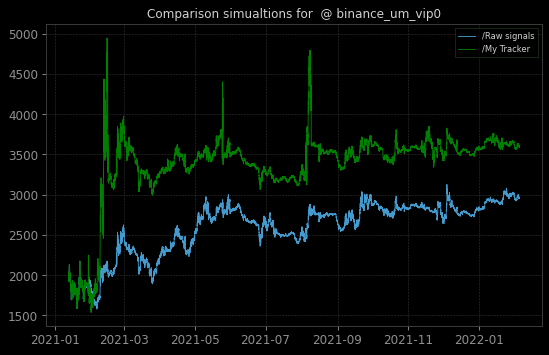

In [321]:
r_ma_gen_track.report(2000)


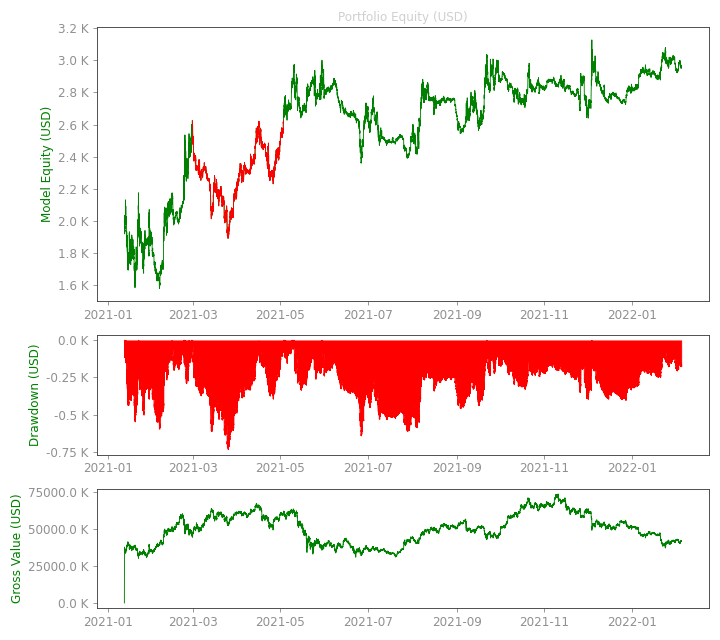

<Figure size 720x640 with 0 Axes>

In [325]:
tearsheet(r_ma_gen_track.results[0], 2000)

In [326]:
r_ma_gen_track.results[1].trackers_stat

{'BTCUSDT': {'positions_incr': 24, 'positions_decr': 32},
 'ETHUSDT': {'positions_incr': 33, 'positions_decr': 38}}